In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
embedding_model = "doc2vec"
data_type = "np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

experiment="embedding"
folder_path_topics = f"preprocessed_data/results/{experiment}/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
file_name_data = f"{data_type}.csv"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    topic_model = Top2Vec(documents = new_data, speed="deep-learn")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

doc2vec


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

22


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['trur', 'seie', 'sjølvsagt', ..., 'fylke', 'vedtak', 'skritt'],
        ['takker', 'svaret', 'statsraden', ..., 'innspill', 'person',
         'vurdert'],
        ['stemme', 'forslagene', 'innstillingen', ..., 'merknadene',
         'høyres', 'partier'],
        ...,
        ['mat', 'landbruket', 'landbruk', ..., 'avgifter', 'verden',
         'fattige'],
        ['barnehagene', 'barnehager', 'barnehage', ..., 'behandlet',
         'offentlig', 'barne'],
        ['alkohol', 'galt', 'skaper', ..., 'problemer', 'oppna',
         'kriminalitet']], dtype='<U15'),
 array([[0.6553262 , 0.61152947, 0.60809255, ..., 0.15943974, 0.15804261,
         0.15504698],
        [0.4631252 , 0.36225283, 0.3527572 , ..., 0.12911458, 0.12891464,
         0.12659441],
        [0.35535523, 0.33322185, 0.33160183, ..., 0.13884069, 0.13397823,
         0.13382666],
        ...,
        [0.6692419 , 0.6187819 , 0.61286217, ..., 0.15316102, 0.15222076,
         0.15168306],
        [0.70403063, 0.61033

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'trur': 0.6553262, 'seie': 0.61152947, 'sjølvsagt': 0.60809255, 'noreg': 0.6059176, 'mogleg': 0.6013007, 'gjeld': 0.5883388, 'pengar': 0.57280505, 'auka': 0.572513, 'leggje': 0.5699231, 'treng': 0.5659869, 'ønskjer': 0.55683875, 'veit': 0.5525863, 'raudgrøne': 0.5400884, 'viktigaste': 0.5364707, 'kommunar': 0.5353308, 'høgre': 0.5326124, 'saka': 0.5300946, 'legg': 0.52932817, 'kristeleg': 0.5253746, 'auke': 0.52377754, 'kommunane': 0.5218422, 'seia': 0.5070518, 'verda': 0.5024583, 'arbeidarpartiet': 0.4934046, 'offentlege': 0.47750703, 'regjeringa': 0.44002843, 'veg': 0.3947823, 'framtida': 0.2977495, 'menneske': 0.2840802, 'knytte': 0.26974636, 'meldinga': 0.25720802, 'tida': 0.25178787, 'toget': 0.24827377, 'innstillinga': 0.2420891, 'omrade': 0.2296736, 'klimaforliket': 0.22047274, 'folkeretten': 0.20967455, 'vekk': 0.20634557, 'tog': 0.18845187, 'utgangspunkt': 0.18821745, 'prosjekt': 0.18609333, 'parti': 0.18479672, 'iallfall': 0.1835937, 'regelverket': 0.17957824, 'gasskraft

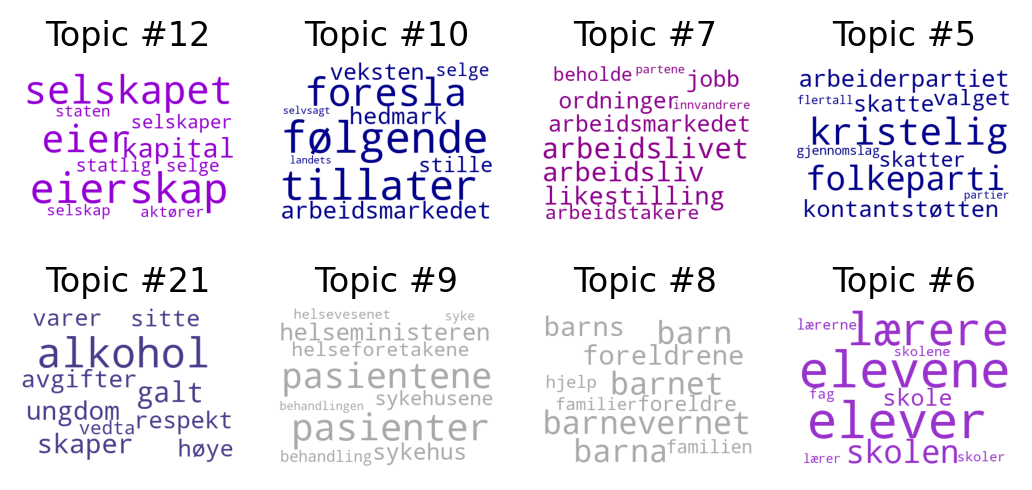

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

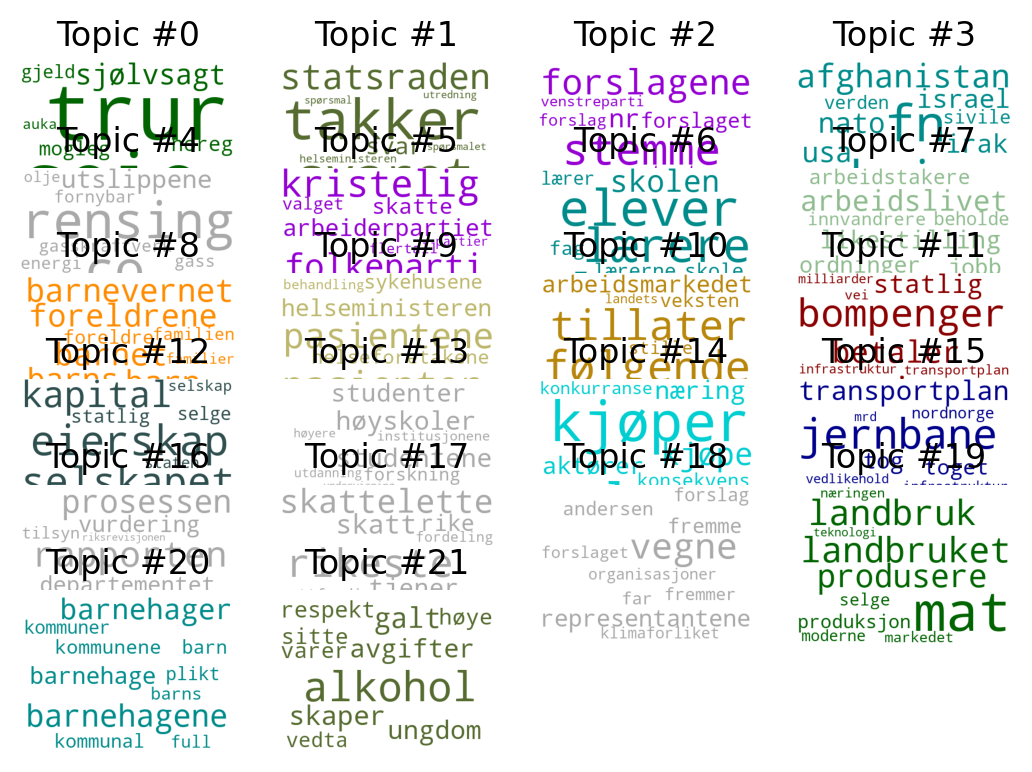

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

22

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('seie', 'trur') wordtuple
('seie', 'trur') wordup
152.0 over
24960.0 under
-7.359402800306025 -7.247927513443586 1.0153802982515585 ('seie', 'trur') 152 160 156
('sjølvsagt', 'trur') wordtuple
('sjølvsagt', 'trur') wordup
100.0 over
18720.0 under
-7.548436624696043 -6.643856189774725 1.1361529222010434 ('sjølvsagt', 'trur') 100 160 117
('noreg', 'trur') wordtuple
('noreg', 'trur') wordup
158.0 over
53120.0 under
-8.393186778057185 -7.303780748177103 1.1491564529989455 ('noreg', 'trur') 158 160 332
('mogleg', 'trur') wordtuple
('mogleg', 'trur') wordup
51.0 over
14080.0 under
-8.108934371553163 -5.672425341971496 1.4295356717264152 ('mogleg', 'trur') 51 160 88
('gjeld', 'trur') wordtuple
('gjeld', 'trur') wordup
176.0 over
53280.0 under
-8.241874843321328 -7.459431618637297 1.1048931426261897 ('gjeld', 'trur') 176 160 333
('pengar', 'trur') wordtuple
('pengar', 'trur') wordup
59.0 over
16800.0 under
-8.153530563191644 -5.882643049361842 1.3860318388817 ('pengar', 'trur') 59 160 105


In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.077588348621953


In [24]:
diversity

0.9227272727272727

In [25]:
coherence

1.9397935592063615

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤═══════════╤══════════╕
│ Model                             │ Metric    │    Value │
╞═══════════════════════════════════╪═══════════╪══════════╡
│ top2vec_doc2vec_np_mini_stopwords │ coherence │ 1.93979  │
├───────────────────────────────────┼───────────┼──────────┤
│ top2vec_doc2vec_np_mini_stopwords │ diversity │ 0.922727 │
╘═══════════════════════════════════╧═══════════╧══════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})